In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

import numpy as np 
import musclebeachtools as mbt
import os
import glob
import pandas as pd
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import seaborn as sns
from copy import deepcopy as cdc
import scipy.io as sio
from sys import platform
from datetime import datetime
import datetime as dt
import time
import scipy
import datetime as dt
import plotly
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
import math
import sahara_work as saw
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import f1_score,v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sahara_work as saw
import musclebeachtools as mbt
import numpy as np
import criticality as cr
import powerlaw
import pdb
import numpy as np
from criticality import pvaluenew2 as pv
from criticality import exclude as ex
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as op


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})

if platform == 'darwin':
    basedir = 'Volumes'
else:
    basedir = 'media'
    
pth = f'/{basedir}/HlabShare/james/'

savedir = f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_4/'
today = datetime.today().strftime('%Y-%m-%d')

cmap = "YlGnBu"



/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
SAVEFIGS = 0

In [3]:
# Ages = [393, 371, 354, 280, 269, 242, 167, 134, 112, 96]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 6.391, 8.29, 8.00, 7.62, 6.30]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 7.45, 8.29, 8.00, 7.62, 8.28]
# Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 8.28]
# ATs = [16.8, 'nan', 11.7, 14.3, 19.6, 11.1, 33.4, 33.5, 19.2, 39.7]
# perc_wake = [74.507246, 'nan', 64.240741, 74.770833, 58.898148, 51.25, 52.898148, 56.009259, 57.21164, 60.759259]
# use_ans = ['caf37','caf62','caf78','caf49','caf52','caf84','caf72','caf48','caf22','caf60']
# use_ans_CAPS = np.array(['CAF37','CAF62','CAF78','CAF49','CAF52','CAF84','CAF72','CAF48','CAF22','CAF60'])

# Ventricles = [0.910262252, 3.865097316, 2.431031144, 0.092032777, 1.454238588, 1.31902801, 0, 0,  0.160132711, 0]
# ATs_james = [51.3195, 80.325, 8.7005, 10.164, 46.095, 1.9035, 8.324, 9.541, 0.604, 1.5315]
# ATs_james_threshold_205 = [66.3845, 84.9, 14.783, 16.177, 60.21, 3.5855, 13.2775, 11.0345, 0.9445, 3.2545]


Ages = np.array([393, 371, 354, 280, 269, 242, 167, 134, 112, 96])
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 6.391, 8.29, 8.00, 7.62, 6.30]
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 7.45, 8.29, 8.00, 7.62, 8.28]
Volumes = np.array([3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 8.28])
ATs = np.array([16.8, 'nan', 11.7, 14.3, 19.6, 11.1, 33.4, 33.5, 19.2, 39.7])
perc_wake = np.array([74.507246, 'nan', 64.240741, 74.770833, 58.898148, 51.25, 52.898148, 56.009259, 57.21164, 60.759259])
use_ans = np.array(['caf37','caf62','caf78','caf49','caf52','caf84','caf72','caf48','caf22','caf60'])
use_ans_CAPS = np.array(['CAF37','CAF62','CAF78','CAF49','CAF52','CAF84','CAF72','CAF48','CAF22','CAF60'])

Ventricles = np.array([0.910262252, 3.865097316, 2.431031144, 0.092032777, 1.454238588, 1.31902801, 0, 0,  0.160132711, 0])
ATs_james = np.array([51.3195, 80.325, 8.7005, 10.164, 46.095, 1.9035, 8.324, 9.541, 0.604, 1.5315])
ATs_james_threshold_205 = np.array([66.3845, 84.9, 14.783, 16.177, 60.21, 3.5855, 13.2775, 11.0345, 0.9445, 3.2545])

sexes = []
sexes = np.array([saw.get_sex(tmpan) for tmpan in use_ans])

M_idx = np.where(sexes == 'M')[0]
F_idx = np.where(sexes == 'F')[0]



In [4]:
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1.pkl').reset_index()
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1_v8.pkl')
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1_v9_fixing_missing_data.pkl')
dfall = pd.read_pickle(f'/{basedir}/HlabShare/te4_manuscript_james/indv_param_with_dist8_justca1_v13.pkl')

#dfall = pd.read_pickle('/media/HlabShare/clayton_sahara_work/criticality/chpc/indv_param_with_dist6_justca1.pkl')

dfall = dfall.drop_duplicates(subset=['animal','probe', 'date', 'time_frame', 'block_num', 'scored'], keep = 'last')

df = dfall


In [6]:
df_FRs

,Animal,mean_FR
0,caf100,6.049955
1,caf101,7.000158
2,caf102,5.799624
3,caf103,8.528872
4,caf104,7.267525
5,caf107,6.444528
6,caf108,4.562110
7,caf109,6.819448
8,caf22,12.927674
9,caf26,6.087587


In [5]:
df_FRs = pd.read_pickle(f'/{basedir}/HlabShare/james/DF_meanFRs_all.pkl')
df_CVs = pd.read_pickle(f'/{basedir}/HlabShare/james/DF_meanCVs_all.pkl')
df_corr_entrs = pd.read_pickle(f'/{basedir}/HlabShare/james/df_corr_entr_all.pkl')

Animals = ['caf37', 'caf62', 'caf78', 'caf49', 'caf52', 'caf84', 'caf72', 'caf48', 'caf22', 'caf60']
#Ages = [393, 371, 354, 280, 269, 242, 167, 134, 112, 96]
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
#AT8s = [16.7975, 61.3665, 11.69, 14.3025, 19.6255, 11.138, 33.384, 33.4825, 19.175, 39.7445]

DCCs_all = []
DCCs_end = []
DCCs_all_passed = []
DCCs_end_passed = []
perc_passed = []
mean_FR = []
mean_CV = []
mean_correlation = []
entropy = []
nearcrit_alldata = []
nearcrit = []

DAYS_PRIOR = 30

for a in Animals:
    print(a)
    tmpdf = []
    tmpdf = df[df.animal == a]
    tmpdf = tmpdf.sort_values(by = 'age_days')
    print('number of blocks (ALL): ' + str(len(tmpdf)))
    print('number of blocks (PASSED): ' + str(len(tmpdf[tmpdf.passed == True])))
    print('number of blocks (near crit): ' + str(len(tmpdf[(tmpdf.passed == True) & (tmpdf.dcc <= .3)])/len(tmpdf)*100))
    
    nearcrit_alldata.append(len(tmpdf[(tmpdf.passed == True) & (tmpdf.dcc < .3)])/len(tmpdf)*100)
    nearcrit.append(len(tmpdf[(tmpdf.age_days >= tmpdf.age_days.max()-DAYS_PRIOR) & (tmpdf.passed == True) & (tmpdf.dcc < .3)])/len(tmpdf[((tmpdf.age_days > tmpdf.age_days.max()-DAYS_PRIOR))])*100)
    
    perc_passed.append(len(tmpdf[tmpdf.passed == True])/len(tmpdf)*100)
    DCCs_all.append(np.mean(tmpdf.dcc))
    DCCs_all_passed.append(np.mean(tmpdf[tmpdf.passed == True].dcc))
    DCCs_end.append(np.mean(tmpdf.iloc[(len(tmpdf) - 24*1) : len(tmpdf)].dcc))
    tmptmpdf = []
    tmptmpdf = tmpdf[tmpdf.passed == True]
    DCCs_end_passed.append(np.mean(tmptmpdf.iloc[(len(tmptmpdf) - 12*1) : len(tmptmpdf)].dcc))
    
    mean_FR.append(df_FRs[df_FRs.Animal == a].mean_FR.to_numpy()[0])
    mean_CV.append(df_CVs[df_CVs.Animal == a].mean_CV.to_numpy()[0])
    mean_correlation.append(df_corr_entrs[df_corr_entrs.Animal == a].mean_correlation.to_numpy()[0])
    entropy.append(df_corr_entrs[df_corr_entrs.Animal == a].entropy.to_numpy()[0])
    

DCCs_all = np.array(DCCs_all)
DCCs_end = np.array(DCCs_end)
DCCs_all_passed = np.array(DCCs_all_passed)
DCCs_end_passed = np.array(DCCs_end_passed)
perc_passed = np.array(perc_passed)
mean_FR = np.array(mean_FR)
mean_CV = np.array(mean_CV)
mean_correlation = np.array(mean_correlation)
entropy = np.array(entropy)
nearcrit = np.array(nearcrit)
nearcrit_alldata = np.array(nearcrit_alldata)




caf37
number of blocks (ALL): 143
number of blocks (PASSED): 6
number of blocks (near crit): 3.4965034965034967
caf62
number of blocks (ALL): 54
number of blocks (PASSED): 1
number of blocks (near crit): 1.8518518518518516
caf78
number of blocks (ALL): 270
number of blocks (PASSED): 111
number of blocks (near crit): 30.37037037037037
caf49
number of blocks (ALL): 861
number of blocks (PASSED): 558
number of blocks (near crit): 64.80836236933798
caf52
number of blocks (ALL): 408
number of blocks (PASSED): 127
number of blocks (near crit): 31.127450980392158
caf84
number of blocks (ALL): 71
number of blocks (PASSED): 16
number of blocks (near crit): 19.718309859154928
caf72
number of blocks (ALL): 542
number of blocks (PASSED): 465
number of blocks (near crit): 82.65682656826569
caf48
number of blocks (ALL): 422
number of blocks (PASSED): 236
number of blocks (near crit): 55.21327014218009
caf22
number of blocks (ALL): 472
number of blocks (PASSED): 342
number of blocks (near crit): 72.0

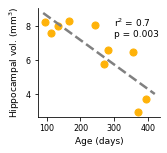

In [67]:
plt.figure(1, figsize = [2.2,2])

plt.scatter(Ages, Volumes, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ages, Volumes)
fitxs = np.arange(90,420,1)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
plt.text(300, 8, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(300, 7.4, 'p = ' + str(round(p_value,3)), fontsize=9)
#plt.ylim([0,9])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Age (days)', fontsize = 9)
plt.ylabel('Hippocampal vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_4/{today}_HippVolume_vs_Age.pdf', bbox_inches = "tight")
    


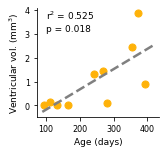

In [36]:
plt.figure(1, figsize = [2.2,2])

plt.scatter(Ages, Ventricles, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ages, Ventricles)
fitxs = np.arange(90,420,1)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
plt.text(100,3.6, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(100, 3.1, 'p = ' + str(round(p_value,3)), fontsize=9)
#plt.ylim([0,4.2])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Age (days)', fontsize = 9)
plt.ylabel('Ventricular vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_4/{today}_VentricularVolume_vs_Age.pdf', bbox_inches = "tight")
    
    

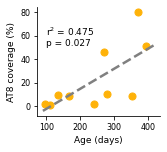

In [37]:
plt.figure(1, figsize = [2.2,2])

plt.scatter(Ages, ATs_james, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ages, ATs_james)
fitxs = np.arange(90,420,1)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
plt.text(100, 60, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(100, 51, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Age (days)', fontsize = 9)
plt.ylabel('AT8 coverage (%)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_4/{today}_AT8_vs_Age.pdf', bbox_inches = "tight")
    
    

# Mean FR and CV vs Histology:

In [38]:
Volumes

array([3.76, 2.98, 6.51, 6.6 , 5.77, 8.07, 8.29, 8.  , 7.62, 8.28])

In [39]:
Animals

['caf37',
 'caf62',
 'caf78',
 'caf49',
 'caf52',
 'caf84',
 'caf72',
 'caf48',
 'caf22',
 'caf60']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


FR vs Hipp Volume p = 0.5022517759271182
CV vs Hipp Volume p = 0.17408698794636748


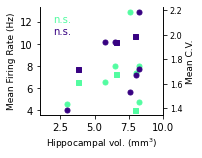

In [40]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(Volumes[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Volumes[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(Volumes[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Volumes[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, mean_FR)
print(f'FR vs Hipp Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, mean_CV)
print(f'CV vs Hipp Volume p = {p_value}')

plt.xlim([1,10])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Hippocampal vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(2,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(2,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_HippVol.pdf', bbox_inches = "tight")
    
    

FR vs Ventricular Volume p = 0.5379769874716338
CV vs Ventricular Volume p = 0.15434165989261964


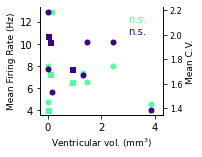

In [41]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(Ventricles[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Ventricles[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(Ventricles[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Ventricles[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, mean_FR)
print(f'FR vs Ventricular Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, mean_CV)
print(f'CV vs Ventricular Volume p = {p_value}')

plt.xlim([-.3,4.3])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Ventricular vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_VentrVol.pdf', bbox_inches = "tight")
    

FR vs AT8% p = 0.26680805731757856
CV vs AT8% p = 0.17561950979869173


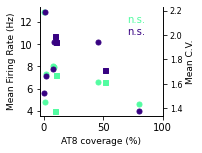

In [46]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(ATs_james[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(ATs_james[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(ATs_james[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(ATs_james[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, mean_FR)
print(f'FR vs AT8% p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, mean_CV)
print(f'CV vs AT8% p = {p_value}')

plt.xlim([-3,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('AT8 coverage (%)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(70,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(70,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_AT8.pdf', bbox_inches = "tight")
    

In [49]:
SAVEFIGS = 0

# DCC vs Histology, using percent passed blocks:

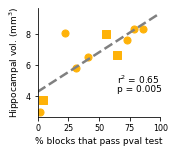

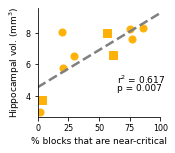

In [85]:
plt.figure(1, figsize = [2.2,2])

DCC_measure = perc_passed

plt.scatter(DCC_measure[M_idx], Volumes[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], Volumes[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Volumes)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(65, 4.8, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(65, 4.3, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that pass pval test', fontsize = 9)
plt.ylabel('Hippocampal vol. (mm$^3$)', fontsize = 9)

sns.despine()

plt.figure(2, figsize = [2.2,2])

DCC_measure = nearcrit

plt.scatter(DCC_measure[M_idx], Volumes[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], Volumes[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Volumes)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(65, 4.8, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(65, 4.3, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that are near-critical', fontsize = 9)
plt.ylabel('Hippocampal vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percpassed_vs_HippVol.pdf', bbox_inches = "tight")
    

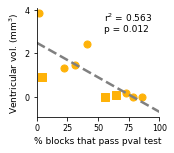

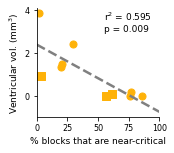

In [86]:
plt.figure(1, figsize = [2.2,2])

DCC_measure = perc_passed

plt.scatter(DCC_measure[M_idx], Ventricles[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], Ventricles[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Ventricles)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(55, 3.5, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(55, 3, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that pass pval test', fontsize = 9)
plt.ylabel('Ventricular vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percpassed_vs_VentrVol.pdf', bbox_inches = "tight")
    
    
plt.figure(2, figsize = [2.2,2])

DCC_measure = nearcrit

plt.scatter(DCC_measure[M_idx], Ventricles[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], Ventricles[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Ventricles)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(55, 3.5, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(55, 3, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that are near-critical', fontsize = 9)
plt.ylabel('Ventricular vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percpassed_vs_VentrVol.pdf', bbox_inches = "tight")
    
    

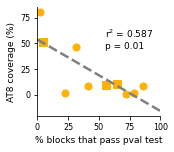

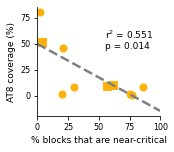

In [87]:
plt.figure(1, figsize = [2.2,2])

DCC_measure = perc_passed

plt.scatter(DCC_measure[M_idx], ATs_james[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], ATs_james[F_idx], s = 50, color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, ATs_james)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(55, 55, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(55, 45, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that pass pval test', fontsize = 9)
plt.ylabel('AT8 coverage (%)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percpassed_vs_AT8.pdf', bbox_inches = "tight")
    
plt.figure(2, figsize = [2.2,2])
DCC_measure = nearcrit

plt.scatter(DCC_measure[M_idx], ATs_james[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(DCC_measure[F_idx], ATs_james[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, ATs_james)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(55, 55, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(55, 45, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.xlim([0,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('% blocks that are near-critical', fontsize = 9)
plt.ylabel('AT8 coverage (%)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percpassed_vs_AT8.pdf', bbox_inches = "tight")
    
    

In [75]:
SAVEFIGS = 0

# DCC vs Histology:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


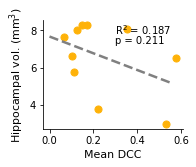

In [40]:
plt.figure(1, figsize = [2.5,2])

DCC_measure = DCCs_end

plt.scatter(DCC_measure, Volumes, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Volumes)
fitxs = np.arange(0, .6,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(.3, 7.8, 'R$^2$ = ' + str(round(r_value**2,3)), fontsize=10)
plt.text(.3, 7.3, 'p = ' + str(round(p_value,3)), fontsize=10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Mean DCC', fontsize = 11)
plt.ylabel('Hippocampal vol. (mm$^3$)', fontsize = 11)

sns.despine()

#plt.savefig('/media/HlabShare/james/HippVol_vs_DCC_END.pdf')  


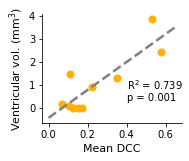

In [73]:
plt.figure(1, figsize = [2.5,2])

plt.scatter(DCC_measure, Ventricles, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, Ventricles)
fitxs = np.arange(0, .7,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(.4, .8, 'R$^2$ = ' + str(round(r_value**2,3)), fontsize=10)
plt.text(.4, .3, 'p = ' + str(round(p_value,3)), fontsize=10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Mean DCC', fontsize = 11)
plt.ylabel('Ventricular vol. (mm$^3$)', fontsize = 11)

sns.despine()

#plt.savefig('/media/HlabShare/james/VentricularVol_vs_DCC_END.pdf')  


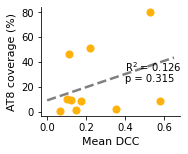

In [74]:
plt.figure(1, figsize = [2.5,2])

plt.scatter(DCC_measure, ATs_james, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, ATs_james)
fitxs = np.arange(0, .7,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(.4, 32, 'R$^2$ = ' + str(round(r_value**2,3)), fontsize=10)
plt.text(.4, 24, 'p = ' + str(round(p_value,3)), fontsize=10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Mean DCC', fontsize = 11)
plt.ylabel('AT8 coverage (%)', fontsize = 11)

sns.despine()

#plt.savefig('/media/HlabShare/james/AT8_vs_DCC_END.pdf')  


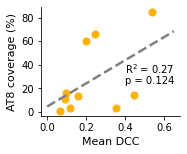

In [42]:
plt.figure(1, figsize = [2.5,2])

plt.scatter(DCC_measure, ATs_james_threshold_205, s = 50, color = sns.xkcd_rgb['saffron'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(DCC_measure, ATs_james_threshold_205)
fitxs = np.arange(0, .7,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(.4, 32, 'R$^2$ = ' + str(round(r_value**2,3)), fontsize=10)
plt.text(.4, 24, 'p = ' + str(round(p_value,3)), fontsize=10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Mean DCC', fontsize = 11)
plt.ylabel('AT8 coverage (%)', fontsize = 11)

sns.despine()

#plt.savefig('/media/HlabShare/james/AT8_vs_DCC_END.pdf')  


# DCC and nearcrit vs sleep/wake regplots, using ML scored data:

/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


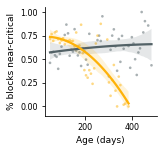

In [6]:
#figa, axa = plt.subplots(ncols = 1, nrows = 2, figsize = [3,3])

dcc_df = []
dcc_df = df
dcc_df = dcc_df.sort_values(by='age_days')

bins = np.arange(50,530,7)
dcc_df['bin'] = pd.cut(dcc_df['age_days'], bins)

wtpassed = []
te4passed = []
  
wt_means_passed = []
wt_sems_passed = []
te4_means_passed = []
te4_sems_passed = []

for a in np.arange(0,len(bins)-1):
    tmpdf = []
    tmpdf = dcc_df[dcc_df.age_days > bins[a]]
    tmpdf = tmpdf[tmpdf.age_days < bins[a+1]]
    
    tmpwt = []
    tmpte4 = []
    
    tmpwt = tmpdf[tmpdf.geno != 'te4']
    tmpte4 = tmpdf[tmpdf.geno == 'te4']
    
    wt_an_bin = []
    if len(tmpwt) > 0:
        for b in tmpwt.animal.unique():
            tmpanimalwt = []
            tmpanimalwt = tmpwt[tmpwt.animal == b]
            wt_an_bin.append(len(tmpanimalwt[(tmpanimalwt.passed == True) & (tmpanimalwt.dcc < .3)])/len(tmpanimalwt))
    if len(wt_an_bin) > 0:
        wt_means_passed.append(np.mean(wt_an_bin))
        wt_sems_passed.append(scipy.stats.sem(wt_an_bin))
    else:
        wt_means_passed.append(np.nan)
        wt_sems_passed.append(scipy.stats.sem(np.nan))
        
    te4_an_bin = []
    if len(tmpte4) > 0:
        for b in tmpte4.animal.unique():
            tmpanimalte4 = []
            tmpanimalte4 = tmpte4[tmpte4.animal == b]
            te4_an_bin.append(len(tmpanimalte4[(tmpanimalte4.passed == True) & (tmpanimalte4.dcc < .3)])/len(tmpanimalte4))
    if len(te4_an_bin) > 0:
        te4_means_passed.append(np.mean(te4_an_bin))
        te4_sems_passed.append(scipy.stats.sem(te4_an_bin))
    else:
        te4_means_passed.append(np.nan)
        te4_sems_passed.append(scipy.stats.sem(np.nan))
            
    if len(tmpwt) > 0:
        wtpassed.append(len(tmpwt[(tmpwt.passed == True) & (tmpwt.dcc < .3)])/len(tmpwt))
    else:
        wtpassed.append(np.nan)
    if len(tmpte4) > 0:
        te4passed.append(len(tmpte4[(tmpte4.passed == True) & (tmpte4.dcc < .3)])/len(tmpte4))
    else:
        te4passed.append(np.nan)

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [2,2])

ax.scatter(bins[:-1], wtpassed, s=7, color=sns.xkcd_rgb['gunmetal'], alpha = 0.5, edgecolor = [])
ax.scatter(bins[:-1], te4passed, s=7, color=sns.xkcd_rgb['saffron'], alpha = 0.5, edgecolor = [])

tmpdata = {
  "Xs": bins[:-1],
  "wtpassed": wtpassed,
    "te4passed": te4passed,
}

#load data into a DataFrame object:
testdf = pd.DataFrame(tmpdata)
testdf['te4passed'] = testdf['te4passed']*100
testdf['wtpassed'] = testdf['wtpassed']*100

sns.regplot(data = testdf, x = bins[:-1], y = wtpassed, order = 2, color = sns.xkcd_rgb['gunmetal'], scatter=False)
sns.regplot(data = testdf, x = bins[:-1], y = te4passed, order = 2, color = sns.xkcd_rgb['saffron'], scatter=False)

plt.xlabel('Age (days)', fontsize=9)
plt.ylabel('% blocks near-critical', fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percentnearcritical.pdf')
    

In [89]:
te4_timewake = pd.read_pickle('/media/HlabShare/james_work/filtered_timewake_te4_v0.pkl')
te4_timewake['%Wake'] = te4_timewake['Time']*100
te4_timewake['%Sleep'] = 100 - te4_timewake['%Wake']

wt_timewake = pd.read_pickle('/media/HlabShare/james_work/filtered_timewake_wte4_v0.pkl')
wt_timewake['%Wake'] = wt_timewake['Time']*100
wt_timewake['%Sleep'] = 100 - wt_timewake['%Wake']



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


y = 4.41e-06*x**2 + -0.00102*x + 0.15851
Inflection point of DCC data: 115
y = 0.00047852*x**2 + -0.14181*x + 66.34691
Inflection point of DCC data: 148


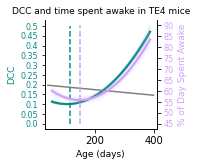

In [8]:
plot_wt = 1 #1 to plot wt data, 0 to skip plotting wt

dcc_df_te4 = []
dcc_df_te4 = df[df['geno'] == 'te4']
dcc_df_te4 = dcc_df_te4[dcc_df_te4.dcc < 1]
dcc_df_wt = []
dcc_df_wt = df[df['geno'] != 'te4']
dcc_df_wt = dcc_df_wt[dcc_df_wt.dcc < 1]

fig, ax1 = plt.subplots(figsize = [2,2])
ax2 = ax1.twinx()

g = sns.regplot(x = 'age_days', y= 'dcc', data = df[df['geno'] == 'te4'], order=2, color = sns.xkcd_rgb['greenish blue'], label='TE4', scatter=False, ax=ax1)
g2 = sns.regplot(x = 'Age', y= '%Wake', data = te4_timewake, order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)
#g3 = sns.regplot(x = 'age_days', y= 'dcc', data = df[df['geno'] != 'te4'], order=1, color = sns.xkcd_rgb['gunmetal'], scatter=False, ax=ax1)

deg = 2
my_fitting = np.polyfit(dcc_df_te4['age_days'], dcc_df_te4['dcc'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
dcc_infl = np.min(np.where(dy > 0))
print(f'y = {round(my_fitting[0][0], 8)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'Inflection point of DCC data: {dcc_infl}')
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Wake'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
timewake_infl = np.min(np.where(dy > 0))
print(f'y = {round(my_fitting[0][0], 8)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'Inflection point of DCC data: {timewake_infl}')
ax1.vlines(dcc_infl, 0.0, 0.5, linestyle='--', color=sns.xkcd_rgb['greenish blue'])
ax2.vlines(timewake_infl, 45, 90, linestyle='--', color=sns.xkcd_rgb['lilac'])

plt.xlim([30,410])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Age (days)', fontsize = 9)
ax1.set_ylabel('DCC', fontsize = 9, color=sns.xkcd_rgb['greenish blue'])
ax1.set_yticks(np.arange(0,.52,.05),np.around(np.arange(0,.52,.05),3),color=sns.xkcd_rgb['greenish blue'], fontsize = 8)
ax2.set_ylabel('% of Day Spent Awake', fontsize = 9, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(45,92,5),np.around(np.arange(45,92,5),1),color=sns.xkcd_rgb['lilac'], fontsize = 8)

if plot_wt == 1:
    my_fitting = np.polyfit(dcc_df_wt['age_days'], dcc_df_wt['dcc'], 1, full=True)
    x = np.linspace(40,400,500)
    y = my_fitting[0][0]*x + my_fitting[0][1]
    ax1.plot(x, y, color='grey', linestyle='-')

sns.despine(top=True, right=False)

plt.title('DCC and time spent awake in TE4 mice', fontsize=9)
SAVEFIGS = 0
if SAVEFIGS:
    if plot_wt == 1:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay_MLoutput_plusWT.pdf')
    elif plot_wt == 0:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay_MLoutput.pdf')
    


y = -0.00056*x**2 + 0.03371*x + 73.35599
inflection point for near crit data: 30

y = -0.00048*x**2 + 0.14181*x + 33.65309
inflection point for timesleep data: 148


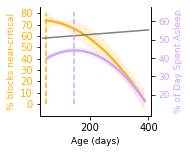

In [131]:
plot_wt = 1 #1 to plot wt data, 0 to skip plotting wt

fig, ax1 = plt.subplots(figsize = [2,2])
ax2 = ax1.twinx()

sns.regplot(data = testdf, x = bins[:-1], y = 'te4passed', order = 2, color = sns.xkcd_rgb['saffron'], scatter=False, ax=ax1)
sns.regplot(x = 'Age', y= '%Sleep', data = te4_timewake, order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

deg = 2
mask = ~np.isnan(testdf['te4passed'])
bins_masked = bins[:-1][mask]
te4passed_masked = np.array(testdf['te4passed'])[mask]
my_fitting = np.polyfit(bins_masked, te4passed_masked, deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
nearcrit_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for near crit data: {nearcrit_infl}')
print('')
deg = 2
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Sleep'], deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
timesleep_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for timesleep data: {timesleep_infl}')

ax1.vlines(50, 0, 80, linestyle='--', color=sns.xkcd_rgb['saffron'])
ax2.vlines(timesleep_infl, 15, 65, linestyle='--', color=sns.xkcd_rgb['lilac'])

plt.xlim([30,410])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 9)
ax1.set_xlabel('Age (days)', fontsize = 9)
ax1.set_ylabel('% blocks near-critical', fontsize = 9, color=sns.xkcd_rgb['saffron'])
ax1.set_yticks(np.arange(0,90,10),np.around(np.arange(0,90,10),3),color=sns.xkcd_rgb['saffron'])
ax2.set_ylabel('% of Day Spent Asleep', fontsize = 9, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(20,70,10),np.around(np.arange(20,70,10),1),color=sns.xkcd_rgb['lilac'])

if plot_wt == 1:
    mask = ~np.isnan(testdf['wtpassed'])
    bins_masked = bins[:-1][mask]
    wtpassed_masked = np.array(testdf['wtpassed'])[mask]
    my_fitting = np.polyfit(bins_masked, wtpassed_masked, 1, full=True)
    x = np.linspace(40,400,500)
    y = my_fitting[0][0]*x+ my_fitting[0][1]
    ax1.plot(x, y, color='grey', linestyle='-')

sns.despine(top=True, right=False)

#plt.title('DCC and time spent awake in TE4 mice', fontsize=12)
SAVEFIGS=0
if SAVEFIGS:
    if plot_wt == 1:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_nearcrit_overlay_plusWT.pdf')
    elif plot_wt == 0:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_nearcrit_overlay.pdf')
        
    

In [133]:
te4_timewake['Age'].min()

54

# Lagged cross-correlation:

# DCC vs time wake:

Max cross-correlation at a lag of 3680


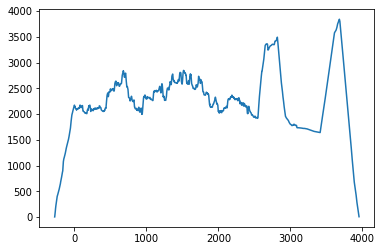

In [130]:
from scipy import signal

# Assume you have two datasets x1, y1 and x2, y2
x1 = dcc_df_te4['age_days']
y1 = dcc_df_te4['dcc']
x2 = te4_timewake['Age']
y2 =  te4_timewake['%Wake']

# Fit polynomials
deg = 2  # degree of polynomial for linear fit
p1 = np.polyfit(x1, y1, deg)
p2 = np.polyfit(x2, y2, deg)
y1_fit = np.polyval(p1, x1)
y2_fit = np.polyval(p2, x2)

# Calculate cross-correlation
xcorr = signal.correlate(y1_fit, y2_fit)
lags = signal.correlation_lags(len(y1_fit), len(y2_fit))
# Find the lag with maximum cross-correlation
lag_max_corr = lags[np.argmax(xcorr)]
print(f"Max cross-correlation at a lag of {lag_max_corr}")

plt.plot(lags, xcorr)


# Near crit vs time sleep:

Max cross-correlation at a lag of -189


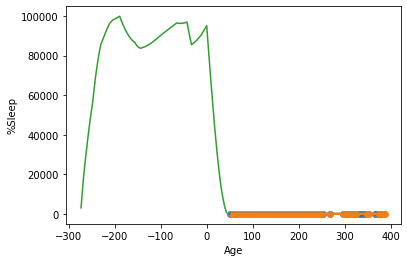

In [125]:
from scipy import signal

mask = ~np.isnan(testdf['te4passed'])
bins_masked = bins[:-1][mask]
te4passed_masked = np.array(testdf['te4passed'])[mask]

# Assume you have two datasets x1, y1 and x2, y2
x1 = bins_masked
y1 = te4passed_masked
x2 = te4_timewake['Age']
y2 =  te4_timewake['%Sleep']

# Fit polynomials
deg = 1  # degree of polynomial for linear fit
p1 = np.polyfit(x1, y1, deg)
p2 = np.polyfit(x2, y2, deg)
y1_fit = np.polyval(p1, x1)
y2_fit = np.polyval(p2, x2)
sns.regplot(x=x1, y=y1)
sns.regplot(x=x2, y=y2)

# Calculate cross-correlation
xcorr = signal.correlate(y1_fit, y2_fit)
lags = signal.correlation_lags(len(y1_fit), len(y2_fit))
# Find the lag with maximum cross-correlation
lag_max_corr = lags[np.argmax(xcorr)]
print(f"Max cross-correlation at a lag of {lag_max_corr}")

plt.plot(lags, xcorr)


In [ ]:
deg = 2
mask = ~np.isnan(testdf['te4passed'])
bins_masked = bins[:-1][mask]
te4passed_masked = np.array(testdf['te4passed'])[mask]
my_fitting = np.polyfit(bins_masked, te4passed_masked, deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
nearcrit_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for near crit data: {nearcrit_infl}')
print('')
deg = 2
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Sleep'], deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
timesleep_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for timesleep data: {timesleep_infl}')

# DCC vs sleep/wake, using manually scored data:

In [6]:
SW = pd.read_pickle(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_5/Sleep_Wake_df.pkl')


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


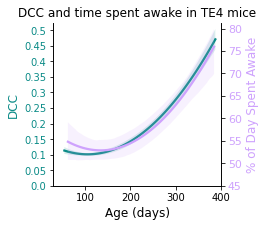

In [7]:
fig, ax1 = plt.subplots(figsize = [3,3])
ax2 = ax1.twinx()

g = sns.regplot(x = 'age_days', y= 'dcc', data = df[df['geno'] == 'te4'], order=2, color = sns.xkcd_rgb['greenish blue'], label='TE4', scatter=False, ax=ax1)
g2 = sns.regplot(x = 'Age', y= '%Wake', data = SW[SW['Genotype'] == 'TE4'], order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

plt.xlim([30,400])
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
ax1.set_xlabel('Age (days)', fontsize = 12)
ax1.set_ylabel('DCC', fontsize = 12, color=sns.xkcd_rgb['greenish blue'])
ax1.set_yticks(np.arange(0,.52,.05),np.around(np.arange(0,.52,.05),3),color=sns.xkcd_rgb['greenish blue'])
ax2.set_ylabel('% of Day Spent Awake', fontsize = 12, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(45,82,5),np.around(np.arange(45,82,5),1),color=sns.xkcd_rgb['lilac'])

#plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
#plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

plt.title('DCC and time spent awake in TE4 mice', fontsize=12)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay.pdf')
    


# Near-critical vs sleep/wake:

/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


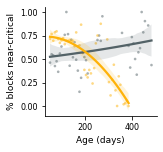

In [141]:
#figa, axa = plt.subplots(ncols = 1, nrows = 2, figsize = [3,3])

dcc_df = []
dcc_df = df
dcc_df = dcc_df.sort_values(by='age_days')

bins = np.arange(50,530,7)
dcc_df['bin'] = pd.cut(dcc_df['age_days'], bins)

wtpassed = []
te4passed = []
  
wt_means_passed = []
wt_sems_passed = []
te4_means_passed = []
te4_sems_passed = []

for a in np.arange(0,len(bins)-1):
    tmpdf = []
    tmpdf = dcc_df[dcc_df.age_days > bins[a]]
    tmpdf = tmpdf[tmpdf.age_days < bins[a+1]]
    
    tmpwt = []
    tmpte4 = []
    
    tmpwt = tmpdf[tmpdf.geno == 'wt']
    tmpte4 = tmpdf[tmpdf.geno == 'te4']
    
    wt_an_bin = []
    if len(tmpwt) > 0:
        for b in tmpwt.animal.unique():
            tmpanimalwt = []
            tmpanimalwt = tmpwt[tmpwt.animal == b]
            wt_an_bin.append(len(tmpanimalwt[(tmpanimalwt.passed == True) & (tmpanimalwt.dcc < .3)])/len(tmpanimalwt))
    if len(wt_an_bin) > 0:
        wt_means_passed.append(np.mean(wt_an_bin))
        wt_sems_passed.append(scipy.stats.sem(wt_an_bin))
    else:
        wt_means_passed.append(np.nan)
        wt_sems_passed.append(scipy.stats.sem(np.nan))
        
    te4_an_bin = []
    if len(tmpte4) > 0:
        for b in tmpte4.animal.unique():
            tmpanimalte4 = []
            tmpanimalte4 = tmpte4[tmpte4.animal == b]
            te4_an_bin.append(len(tmpanimalte4[(tmpanimalte4.passed == True) & (tmpanimalte4.dcc < .3)])/len(tmpanimalte4))
    if len(te4_an_bin) > 0:
        te4_means_passed.append(np.mean(te4_an_bin))
        te4_sems_passed.append(scipy.stats.sem(te4_an_bin))
    else:
        te4_means_passed.append(np.nan)
        te4_sems_passed.append(scipy.stats.sem(np.nan))
            
    if len(tmpwt) > 0:
        wtpassed.append(len(tmpwt[(tmpwt.passed == True) & (tmpwt.dcc < .3)])/len(tmpwt))
    else:
        wtpassed.append(np.nan)
    if len(tmpte4) > 0:
        te4passed.append(len(tmpte4[(tmpte4.passed == True) & (tmpte4.dcc < .3)])/len(tmpte4))
    else:
        te4passed.append(np.nan)

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [2,2])

ax.scatter(bins[:-1], wtpassed, s=7, color=sns.xkcd_rgb['gunmetal'], alpha = 0.5, edgecolor = [])
ax.scatter(bins[:-1], te4passed, s=7, color=sns.xkcd_rgb['saffron'], alpha = 0.5, edgecolor = [])

tmpdata = {
  "Xs": bins[:-1],
  "wtpassed": wtpassed,
    "te4passed": te4passed,
}

#load data into a DataFrame object:
testdf = pd.DataFrame(tmpdata)
testdf['te4passed'] = testdf['te4passed']*100
testdf['wtpassed'] = testdf['wtpassed']*100

sns.regplot(data = testdf, x = bins[:-1], y = wtpassed, order = 2, color = sns.xkcd_rgb['gunmetal'], scatter=False)
sns.regplot(data = testdf, x = bins[:-1], y = te4passed, order = 2, color = sns.xkcd_rgb['saffron'], scatter=False)

plt.xlabel('Age (days)', fontsize=9)
plt.ylabel('% blocks near-critical', fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percentnearcritical.pdf')
    

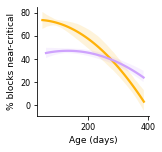

In [51]:
SW['%Sleep'] = 100 - SW['%Wake']

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [2,2])

sns.regplot(data = testdf, x = bins[:-1], y = 'te4passed', order = 2, color = sns.xkcd_rgb['saffron'], scatter=False)
sns.regplot(x = 'Age', y= '%Sleep', data = SW[SW['Genotype'] == 'TE4'], order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False)

plt.xlabel('Age (days)', fontsize=9)
plt.ylabel('% blocks near-critical', fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

sns.despine()

# if SAVEFIGS:
#     plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_percentnearcritical.pdf')
    


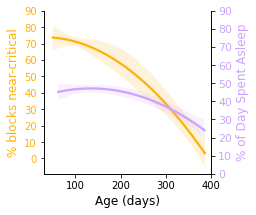

In [10]:
fig, ax1 = plt.subplots(figsize = [3,3])
ax2 = ax1.twinx()

sns.regplot(data = testdf, x = bins[:-1], y = 'te4passed', order = 2, color = sns.xkcd_rgb['saffron'], scatter=False, ax=ax1)
sns.regplot(x = 'Age', y= '%Sleep', data = SW[SW['Genotype'] == 'TE4'], order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

plt.xlim([30,400])
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
ax1.set_xlabel('Age (days)', fontsize = 12)
ax1.set_ylabel('% blocks near-critical', fontsize = 12, color=sns.xkcd_rgb['saffron'])
ax1.set_yticks(np.arange(0,100,10),np.around(np.arange(0,100,10),3),color=sns.xkcd_rgb['saffron'])
ax2.set_ylabel('% of Day Spent Asleep', fontsize = 12, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(0,100,10),np.around(np.arange(0,100,10),1),color=sns.xkcd_rgb['lilac'])

#plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
#plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

#plt.title('DCC and time spent awake in TE4 mice', fontsize=12)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay.pdf')
    

# Here's where I make the best version of the figure panels showing DCC and nearcrit vs time awake or asleep regplots:

In [90]:
te4_timewake = pd.read_pickle('/media/HlabShare/james_work/filtered_timewake_te4_v0.pkl')
te4_timewake['%Wake'] = te4_timewake['Time']*100
te4_timewake['%Sleep'] = 100 - te4_timewake['%Wake']

wt_timewake = pd.read_pickle('/media/HlabShare/james_work/filtered_timewake_wte4_v0.pkl')
wt_timewake['%Wake'] = wt_timewake['Time']*100
wt_timewake['%Sleep'] = 100 - wt_timewake['%Wake']



In [91]:
te4_timewake

,Animal,Date,State,Time,Age,Genotype,%Wake,%Sleep
0,CAF00022,2020-04-20 12:07:45,1,0.558796,63,te4,55.879630,44.120370
3,CAF00022,2020-04-22 12:07:45,1,0.664537,65,te4,66.453704,33.546296
6,CAF00022,2020-04-23 12:07:45,1,0.455787,66,te4,45.578704,54.421296
12,CAF00022,2020-04-25 12:07:45,1,0.426481,68,te4,42.648148,57.351852
15,CAF00022,2020-04-26 12:07:45,1,0.539074,69,te4,53.907407,46.092593
...,...,...,...,...,...,...,...,...
1528,CAF00084,2021-03-16 23:49:28,1,0.512731,218,te4,51.273148,48.726852
1531,CAF00084,2021-03-17 23:49:28,1,0.512778,219,te4,51.277778,48.722222
1534,CAF00084,2021-04-04 06:06:29,1,0.453750,236,te4,45.375000,54.625000
1537,CAF00084,2021-04-05 22:06:29,1,0.475093,238,te4,47.509259,52.490741


y = 0.0*x**2 + -0.00102*x + 0.15851
Inflection point of DCC data: 115
y = 0.00048*x**2 + -0.14181*x + 66.34691
Inflection point of DCC data: 148


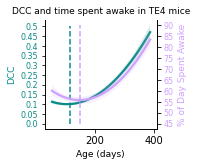

In [148]:
dcc_df_te4 = []
dcc_df_te4 = df[df['geno'] == 'te4']
dcc_df_te4 = dcc_df_te4[dcc_df_te4.dcc < 1]
dcc_df_wt = []
dcc_df_wt = df[df['geno'] != 'te4']
dcc_df_wt = dcc_df_wt[dcc_df_wt.dcc < 1]

fig, ax1 = plt.subplots(figsize = [2,2])
ax2 = ax1.twinx()

g = sns.regplot(x = 'age_days', y= 'dcc', data = df[df['geno'] == 'te4'], order=2, color = sns.xkcd_rgb['greenish blue'], label='TE4', scatter=False, ax=ax1)
g2 = sns.regplot(x = 'Age', y= '%Wake', data = te4_timewake, order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

deg = 2
my_fitting = np.polyfit(dcc_df_te4['age_days'], dcc_df_te4['dcc'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
dcc_infl = np.min(np.where(dy > 0))
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'Inflection point of DCC data: {dcc_infl}')
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Wake'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
timewake_infl = np.min(np.where(dy > 0))
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'Inflection point of DCC data: {timewake_infl}')
ax1.vlines(dcc_infl, 0.0, 0.5, linestyle='--', color=sns.xkcd_rgb['greenish blue'])
ax2.vlines(timewake_infl, 45, 90, linestyle='--', color=sns.xkcd_rgb['lilac'])

plt.xlim([30,410])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Age (days)', fontsize = 9)
ax1.set_ylabel('DCC', fontsize = 9, color=sns.xkcd_rgb['greenish blue'])
ax1.set_yticks(np.arange(0,.52,.05),np.around(np.arange(0,.52,.05),3),color=sns.xkcd_rgb['greenish blue'], fontsize = 8)
ax2.set_ylabel('% of Day Spent Awake', fontsize = 9, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(45,92,5),np.around(np.arange(45,92,5),1),color=sns.xkcd_rgb['lilac'], fontsize = 8)


#plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
#plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

plt.title('DCC and time spent awake in TE4 mice', fontsize=9)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay_MLoutput.pdf')
    


In [175]:
deg = 2
my_fitting = np.polyfit(dcc_df_te4['age_days'], dcc_df_te4['dcc'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
dcc_infl = np.min(np.where(dy > 0))
print(f'Inflection point of DCC data: {dcc_infl}')

deg = 2
my_fitting = np.polyfit(dcc_df_te4['age_days'], dcc_df_te4['dcc'], deg, full=True)

a = my_fitting[0][0]
b = my_fitting[0][1]

# Calculate the x-value of the vertex for the quadratic polynomial
vertex_x = -b / (2 * a)
print(f'Inflection point (or rather the vertex) of DCC data: {vertex_x}')



deg = 2
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Wake'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x +my_fitting[0][2]
dy = np.diff(y) # first derivative
dcc_infl = np.min(np.where(dy > 0))
print(f'Inflection point of DCC data: {dcc_infl}')

deg = 2
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Wake'], deg, full=True)

a = my_fitting[0][0]
b = my_fitting[0][1]

# Calculate the x-value of the vertex for the quadratic polynomial
vertex_x = -b / (2 * a)
print(f'Inflection point (or rather the vertex) of DCC data: {vertex_x}')



Inflection point of DCC data: 115
Inflection point (or rather the vertex) of DCC data: 115.29818956707238
Inflection point of DCC data: 148
Inflection point (or rather the vertex) of DCC data: 148.17962984422644


In [165]:
print('TE4 DCC:')
print('')

x = df[df['geno'] == 'te4']['age_days']
y = df[df['geno'] == 'te4']['dcc']

x_poly = np.column_stack((x**2, x, np.ones_like(x)))

# Fit the model
model = sm.OLS(y, x_poly).fit()

# Get R squared and p-values
print("R squared value:", model.rsquared)
#print("P-values:\n", model.pvalues)
print("Overall model F(2, N-3) =", model.fvalue, "p =", model.f_pvalue)



TE4 DCC:

R squared value: 0.21666619602481763
Overall model F(2, N-3) = 551.1154930231079 p = 4.88804792649175e-212


In [166]:
print('TE4 Time Wake:')
print('')

x = te4_timewake['Age']
y = te4_timewake['%Wake']

x_poly = np.column_stack((x**2, x, np.ones_like(x)))

# Fit the model
model = sm.OLS(y, x_poly).fit()

# Get R squared and p-values
print("R squared value:", model.rsquared)
#print("P-values:\n", model.pvalues)
print("Overall model F(2, N-3) =", model.fvalue, "p =", model.f_pvalue)


TE4 Time Wake:

R squared value: 0.2720877952649583
Overall model F(2, N-3) = 50.64882278189259 p = 2.0497677534754656e-19


In [157]:
from sklearn.metrics import r2_score

x = df[df['geno'] == 'te4']['age_days']
y = df[df['geno'] == 'te4']['dcc']

mymodel = np.poly1d(np.polyfit(x, y, 2))
print(r2_score(y, mymodel(x)))



0.21666619602481763


In [158]:
from sklearn.metrics import r2_score

x = te4_timewake['Age']
y = te4_timewake['%Wake']

mymodel = np.poly1d(np.polyfit(x, y, 2))
print(r2_score(y, mymodel(x)))



0.2720877952649583


In [159]:
mymodel

poly1d([ 4.78521507e-04, -1.41814280e-01,  6.63469112e+01])

In [149]:
np.polyfit(te4_timewake['Age'], te4_timewake['%Wake'], deg, full=True)

(array([ 4.78521507e-04, -1.41814280e-01,  6.63469112e+01]),
 array([23771.73997094]),
 3,
 array([1.63214573, 0.57407466, 0.0808615 ]),
 6.084022174945858e-14)

In [150]:
import statsmodels.api as sm

x = te4_timewake['Age']
y = te4_timewake['%Wake']

# Generate polynomial features
x_poly = np.column_stack((x**2, x, np.ones_like(x)))

# Fit the model
model = sm.OLS(y, x_poly).fit()

# Get R squared and p-values
print("R squared value:", model.rsquared)
print("P-values:\n", model.pvalues)



R squared value: 0.2720877952649583
P-values:
 x1       6.684600e-10
x2       8.268327e-06
const    1.184182e-70
dtype: float64


0.2720877952649583


In [138]:
my_fitting

(array([ 4.78521507e-04, -1.41814280e-01,  6.63469112e+01]),
 array([23771.73997094]),
 3,
 array([1.63214573, 0.57407466, 0.0808615 ]),
 6.084022174945858e-14)

In [139]:
SAVEFIGS = 0

y = -0.00056*x**2 + 0.03371*x + 73.35599
inflection point for near crit data: 30

y = -0.00048*x**2 + 0.14181*x + 33.65309
inflection point for timesleep data: 148


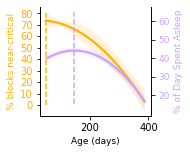

In [177]:
fig, ax1 = plt.subplots(figsize = [2,2])
ax2 = ax1.twinx()

sns.regplot(data = testdf, x = bins[:-1], y = 'te4passed', order = 2, color = sns.xkcd_rgb['saffron'], scatter=False, ax=ax1)
sns.regplot(x = 'Age', y= '%Sleep', data = te4_timewake, order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

deg = 2
mask = ~np.isnan(testdf['te4passed'])
bins_masked = bins[:-1][mask]
te4passed_masked = np.array(testdf['te4passed'])[mask]
my_fitting = np.polyfit(bins_masked, te4passed_masked, deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
nearcrit_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for near crit data: {nearcrit_infl}')
print('')
deg = 2
my_fitting = np.polyfit(te4_timewake['Age'], te4_timewake['%Sleep'], deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x**2 + my_fitting[0][1]*x + my_fitting[0][2]
dy = np.diff(y)
timesleep_infl = np.min(np.where(dy < 0)[0])
print(f'y = {round(my_fitting[0][0], 5)}*x**2 + {round(my_fitting[0][1], 5)}*x + {round(my_fitting[0][2], 5)}')
print(f'inflection point for timesleep data: {timesleep_infl}')

ax1.vlines(50, 0, 80, linestyle='--', color=sns.xkcd_rgb['saffron'])
ax2.vlines(timesleep_infl, 15, 65, linestyle='--', color=sns.xkcd_rgb['lilac'])

plt.xlim([30,410])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 9)
ax1.set_xlabel('Age (days)', fontsize = 9)
ax1.set_ylabel('% blocks near-critical', fontsize = 9, color=sns.xkcd_rgb['saffron'])
ax1.set_yticks(np.arange(0,90,10),np.around(np.arange(0,90,10),3),color=sns.xkcd_rgb['saffron'])
ax2.set_ylabel('% of Day Spent Asleep', fontsize = 9, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(20,70,10),np.around(np.arange(20,70,10),1),color=sns.xkcd_rgb['lilac'])

#plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
#plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

#plt.title('DCC and time spent awake in TE4 mice', fontsize=12)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_nearcrit_overlay.pdf')
    

In [178]:
print('TE4 % near-critical:')
print('')

x = bins_masked
y = te4passed_masked

x_poly = np.column_stack((x**2, x, np.ones_like(x)))

# Fit the model
model = sm.OLS(y, x_poly).fit()

# Get R squared and p-values
print("R squared value:", model.rsquared)
#print("P-values:\n", model.pvalues)
print("Overall model F(2, N-3) =", model.fvalue, "p =", model.f_pvalue)



TE4 % near-critical:

R squared value: 0.6706874810845633
Overall model F(2, N-3) = 41.75089792369582 p = 1.2911269242163886e-10


In [78]:
SAVEFIGS = 0

In [120]:
deg = 1
my_fitting = np.polyfit(wt_timewake['Age'], wt_timewake['%Wake'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x +my_fitting[0][1]
print(f'y = {round(my_fitting[0][0], 5)}*x + {round(my_fitting[0][1], 5)}')



y = -0.01174*x + 53.88271


In [125]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(wt_timewake['Age'], wt_timewake['%Wake'])

print(r_value**2)
print(p_value)



0.017995503290649712
0.011404288911252721


In [126]:
dcc_df_te4 = []
dcc_df_te4 = df[df['geno'] == 'te4']
dcc_df_te4 = dcc_df_te4[dcc_df_te4.dcc < 1]
dcc_df_wt = []
dcc_df_wt = df[df['geno'] != 'te4']
dcc_df_wt = dcc_df_wt[dcc_df_wt.dcc < 1]
dcc_df_wt


,level_0,index,animal,probe,date,time_frame,block_num,scored,bday,rstart_time,...,acc2,br1,br2,burst,T,num_cells,npy_file,region,age_days,phase
2,2.0,0.0,caf95,probe1,041921,156_158,0,xgb,2021-01-30 07:30:00,2021-04-26 03:01:32,...,0.94249,0.861141,0.925759,"[3, 10, 13, 12, 8, 2, 11, 9, 1, 27, 4, 26, 5, ...","[2, 4, 4, 3, 2, 1, 3, 3, 1, 7, 3, 6, 2, 1, 7, ...",26,/scratch/khengen_lab/crit_sahara/DATA/media/Hl...,CA1,85.813565,B
3,3.0,0.0,caf88,probe1,040221,88_92,0,xgb,2019-12-05 07:30:00,2021-04-06 05:07:39,...,0.872497,0.994047,0.99331,"[1, 10, 4, 3, 6, 4, 8, 4, 13, 4, 4, 6, 4, 3, 4...","[1, 5, 2, 1, 3, 3, 2, 3, 5, 1, 1, 3, 2, 2, 1, ...",33,/scratch/khengen_lab/crit_sahara/DATA/media/Hl...,CA1,487.901146,C
4,4.0,0.0,caf88,probe1,040221,88_92,1,xgb,2019-12-05 07:30:00,2021-04-06 05:07:39,...,0.612341,0.995305,0.995259,"[2, 3, 8, 3, 2, 3, 3, 2, 3, 5, 1, 4, 5, 2, 2, ...","[1, 1, 5, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, ...",33,/scratch/khengen_lab/crit_sahara/DATA/media/Hl...,CA1,487.984479,C
9,9.0,0.0,caf26,probe2,081020,8_16,0,xgb,2020-02-20 07:30:00,2020-08-10 23:03:49,...,0.89467,0.988284,0.98803,"[2, 4, 1, 5, 3, 2, 3, 3, 6, 1, 2, 1, 1, 1, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, ...",21,/scratch/khengen_lab/crit_sahara/DATA/media/Hl...,CA1,172.648484,B
10,10.0,0.0,caf26,probe2,081020,8_16,1,xgb,2020-02-20 07:30:00,2020-08-10 23:03:49,...,0.905339,0.991756,0.985811,"[18, 17, 2, 3, 4, 6, 7, 1, 22, 2, 1, 33, 6, 1,...","[7, 8, 2, 1, 2, 5, 3, 1, 9, 1, 1, 12, 3, 1, 2,...",21,/scratch/khengen_lab/crit_sahara/DATA/media/Hl...,CA1,172.731817,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,caf102,probe1,052021,192_196,0,xgb,2021-01-30 07:30:00,2021-05-28 16:34:19,...,None,None,None,"[12, 1, 1, 1, 6, 2, 1, 8, 3, 4, 7, 5, 4, 2, 1,...","[7, 1, 1, 1, 2, 2, 1, 4, 2, 3, 3, 2, 2, 1, 1, ...",25,/media/HlabShare/Clustering_Data/CAF00102/caf1...,NaN,118.377998,NaN
0,NaN,NaN,caf102,probe1,052021,192_196,1,xgb,2021-01-30 07:30:00,2021-05-28 16:34:19,...,None,None,None,"[2, 1, 1, 1, 2, 1, 1, 1, 1, 6, 9, 5, 2, 1, 6, ...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 3, 1, 1, 3, ...",25,/media/HlabShare/Clustering_Data/CAF00102/caf1...,NaN,118.461331,NaN
0,NaN,NaN,caf102,probe1,052021,196_200,0,xgb,2021-01-30 07:30:00,2021-05-28 20:34:19,...,None,None,None,"[36, 2, 7, 5, 2, 8, 6, 5, 21, 5, 30, 7, 2, 2, ...","[16, 1, 3, 2, 1, 4, 3, 4, 8, 3, 12, 3, 2, 1, 1...",19,/media/HlabShare/Clustering_Data/CAF00102/caf1...,NaN,118.544664,NaN
0,NaN,NaN,caf102,probe1,052021,196_200,1,xgb,2021-01-30 07:30:00,2021-05-28 20:34:19,...,None,None,None,"[4, 1, 5, 6, 1, 13, 4, 2, 2, 4, 3, 1, 2, 2, 4,...","[3, 1, 4, 5, 1, 10, 3, 2, 2, 2, 2, 1, 1, 2, 2,...",19,/media/HlabShare/Clustering_Data/CAF00102/caf1...,NaN,118.627998,NaN


In [134]:
print('WT DCC linear fit:')
deg = 1
my_fitting = np.polyfit(dcc_df_wt['age_days'], dcc_df_wt['dcc'], deg, full=True)
x = np.linspace(0,500, 500)
y = my_fitting[0][0]*x +my_fitting[0][1]
print(f'y = {round(my_fitting[0][0], 5)}*x + {round(my_fitting[0][1], 5)}')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dcc_df_wt['age_days'], dcc_df_wt['dcc'])
print('r squared = ' + str(r_value**2))
print('p = ' + str(p_value))


WT DCC linear fit:
y = -0.00014*x + 0.20288
r sqaured = 0.007842591302717701
p = 1.305745901269054e-09


In [144]:
testdf['wtpassed']

0     46.153846
1     55.038760
2     53.900709
3     42.514970
4     47.635135
        ...    
63          NaN
64          NaN
65          NaN
66          NaN
67          NaN
Name: wtpassed, Length: 68, dtype: float64

In [147]:
deg = 1
mask = ~np.isnan(testdf['wtpassed'])
bins_masked = bins[:-1][mask]
wtpassed_masked = np.array(testdf['wtpassed'])[mask]
my_fitting = np.polyfit(bins_masked, wtpassed_masked, deg, full=True)
x = np.linspace(0, 500, 500)
y = my_fitting[0][0]*x + my_fitting[0][1]

print(f'y = {round(my_fitting[0][0], 5)}*x + {round(my_fitting[0][1], 5)}')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bins_masked, wtpassed_masked)
print('r squared = ' + str(r_value**2))
print('p = ' + str(p_value))




y = 0.03997*x + 49.80986
r squared = 0.0844309197511726
p = 0.06532799666615516


# LMER on timewake:

In [96]:
# Define a function to categorize age
def categorize_age(age):
    if age < 91:
        return 'young'
    elif 91 <= age <= 274:
        return 'mid'
    else:
        return 'old'

# Apply the function to the age column to create the age_group column
te4_timewake['age_group'] = te4_timewake['Age'].apply(categorize_age)
wt_timewake['age_group'] = wt_timewake['Age'].apply(categorize_age)



In [97]:
timewake_df = pd.concat([te4_timewake, wt_timewake], ignore_index=True)

In [105]:
timewake_df['PercentWake'] = timewake_df['%Wake']
timewake_df['PercentSleep'] = timewake_df['%Sleep']
timewake_df

,Animal,Date,State,Time,Age,Genotype,%Wake,%Sleep,age_group,PercentWake,PercentSleep
0,CAF00022,2020-04-20 12:07:45,1,0.558796,63,te4,55.879630,44.120370,young,55.879630,44.120370
1,CAF00022,2020-04-22 12:07:45,1,0.664537,65,te4,66.453704,33.546296,young,66.453704,33.546296
2,CAF00022,2020-04-23 12:07:45,1,0.455787,66,te4,45.578704,54.421296,young,45.578704,54.421296
3,CAF00022,2020-04-25 12:07:45,1,0.426481,68,te4,42.648148,57.351852,young,42.648148,57.351852
4,CAF00022,2020-04-26 12:07:45,1,0.539074,69,te4,53.907407,46.092593,young,53.907407,46.092593
...,...,...,...,...,...,...,...,...,...,...,...
624,KDR00036,2022-02-04 06:03:42,1,0.470880,94,wt,47.087963,52.912037,mid,47.087963,52.912037
625,KDR00036,2022-02-05 16:21:25,1,0.430417,96,wt,43.041667,56.958333,mid,43.041667,56.958333
626,KDR00036,2022-02-06 16:21:25,1,0.503426,97,wt,50.342593,49.657407,mid,50.342593,49.657407
627,KDR00036,2022-02-08 01:21:25,1,0.447407,98,wt,44.740741,55.259259,mid,44.740741,55.259259


In [103]:
timewake_df.to_csv(f'/media/HlabShare/te4_manuscript_james/manuscript_folders/{today}_timewake_ML_grouped_e4_wt.csv')


In [104]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

%load_ext rpy2.ipython
# Enable cell magic for Rpy2 interface

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [111]:
%%R

# load LMER libraries
library(tidyverse)
library(lme4)
library(lmerTest)
library(emmeans)
# load dataset in R
#fn = '/media/HlabShare/te4_manuscript_james/manuscript_folders/FR_by_SW_grouped_e4_wt.csv'

fn = '/media/HlabShare/te4_manuscript_james/manuscript_folders/2023-08-15_timewake_ML_grouped_e4_wt.csv'
wake_data <- read_csv(file = fn)

#fr_lmer = lmer(firing_rates ~ age_group * geno * state * cell_type  + (1|animal), data = filtered_data)
wake_lmer = lmer(PercentWake ~ age_group * Genotype  + (1|Animal), data = wake_data)


New names:
• `` -> `...1`
Rows: 629 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Animal, Genotype, age_group
dbl  (8): ...1, State, Time, Age, %Wake, %Sleep, PercentWake, PercentSleep
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [112]:
%%R 
# this will provide general information
summary(wake_lmer)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: PercentWake ~ age_group * Genotype + (1 | Animal)
   Data: wake_data

REML criterion at convergence: 4514.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5644 -0.4993 -0.0599  0.4021  3.2775 

Random effects:
 Groups   Name        Variance Std.Dev.
 Animal   (Intercept) 37.07    6.089   
 Residual             71.90    8.480   
Number of obs: 629, groups:  Animal, 32

Fixed effects:
                          Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                 54.687      2.448  24.978  22.343  < 2e-16 ***
age_groupold                17.894      4.667  28.964   3.834 0.000628 ***
age_groupyoung               2.887      1.537 620.857   1.878 0.060909 .  
Genotypewt                  -3.676      3.098  27.938  -1.187 0.245407    
age_groupold:Genotypewt    -17.722      5.623  30.142  -3.152 0.003652 ** 
age_groupyoung:Genotypewt   -3.442      2.299 555.16

In [113]:
%%R
# This will give us feedback about whether the main effects are significant 
anova(wake_lmer)


Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
age_group           763.53  381.76     2 56.224  5.3094 0.0077244 ** 
Genotype           1284.25 1284.25     1 27.121 17.8608 0.0002409 ***
age_group:Genotype  792.30  396.15     2 56.224  5.5095 0.0065313 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [115]:
%%R
emmresults = emmeans(wake_lmer, pairwise ~  age_group * Genotype, adjust = 'tukey')
print(emmresults)


$emmeans
 age_group Genotype emmean   SE   df lower.CL upper.CL
 mid       te4        54.7 2.45 24.9     49.6     59.7
 old       te4        72.6 3.98 30.6     64.5     80.7
 young     te4        57.6 2.66 33.9     52.2     63.0
 mid       wt         51.0 1.90 34.0     47.1     54.9
 old       wt         51.2 2.50 32.3     46.1     56.3
 young     wt         50.5 2.00 39.5     46.4     54.5

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast             estimate   SE    df t.ratio p.value
 mid te4 - old te4     -17.894 4.67  28.9  -3.829  0.0076
 mid te4 - young te4    -2.887 1.54 620.9  -1.873  0.4200
 mid te4 - mid wt        3.676 3.10  27.8   1.185  0.8401
 mid te4 - old wt        3.504 3.50  28.3   1.001  0.9136
 mid te4 - young wt      4.231 3.16  29.6   1.337  0.7624
 old te4 - young te4    15.007 4.79  31.6   3.135  0.0393
 old te4 - mid wt       21.570 4.41  31.2   4.890  0.0004
 old te4 - old wt       21.398 4.70  31.1   4.553  0.0010


In [68]:
te4passed_masked

array([71.42857143, 76.62337662, 69.5       , 78.47222222, 79.48717949,
       71.37681159, 67.21311475, 69.87951807, 72.31404959, 65.78947368,
       69.56521739, 69.23076923, 70.23809524, 68.96551724, 69.3877551 ,
       63.63636364, 78.31325301, 63.63636364, 64.51612903, 86.53846154,
       56.30252101, 38.46153846, 32.96703297, 30.43478261, 38.39285714,
       34.69387755, 23.94366197, 40.32258065, 66.66666667, 75.        ,
       87.5       , 70.88607595, 25.42372881, 11.26760563, 28.        ,
       43.90243902, 16.66666667,  0.        , 31.57894737, 22.58064516,
        1.85185185,  2.98507463,  5.55555556,  0.        ])

In [69]:
bins[:-1]

array([ 50,  57,  64,  71,  78,  85,  92,  99, 106, 113, 120, 127, 134,
       141, 148, 155, 162, 169, 176, 183, 190, 197, 204, 211, 218, 225,
       232, 239, 246, 253, 260, 267, 274, 281, 288, 295, 302, 309, 316,
       323, 330, 337, 344, 351, 358, 365, 372, 379, 386, 393, 400, 407,
       414, 421, 428, 435, 442, 449, 456, 463, 470, 477, 484, 491, 498,
       505, 512, 519])

In [46]:
np.array(testdf['te4passed'])

array([71.42857143, 76.62337662, 69.5       , 78.47222222, 79.48717949,
       71.37681159, 67.21311475, 69.87951807, 72.31404959, 65.78947368,
       69.56521739, 69.23076923, 70.23809524, 68.96551724, 69.3877551 ,
       63.63636364, 78.31325301, 63.63636364, 64.51612903, 86.53846154,
       56.30252101, 38.46153846, 32.96703297, 30.43478261, 38.39285714,
       34.69387755, 23.94366197, 40.32258065, 66.66666667, 75.        ,
               nan, 87.5       ,         nan,         nan,         nan,
       70.88607595, 25.42372881, 11.26760563, 28.        , 43.90243902,
       16.66666667,  0.        , 31.57894737, 22.58064516,         nan,
        1.85185185,  2.98507463,  5.55555556,  0.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan])

In [15]:
SAVEFIGS = 0

Max cross-correlation at a lag of -4


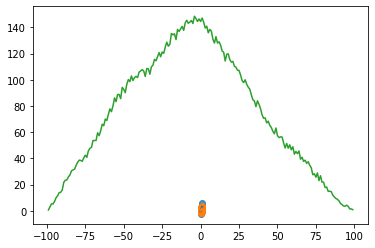

In [16]:
from scipy import signal

# Assume you have two datasets x1, y1 and x2, y2
x1 = np.random.rand(100)
y1 = 3 * x1 + np.random.normal(size=100)
x2 = np.random.rand(100)
y2 = 2 * x2 + np.random.normal(size=100)

# Fit polynomials
deg = 1  # degree of polynomial for linear fit
p1 = np.polyfit(x1, y1, deg)
p2 = np.polyfit(x2, y2, deg)
y1_fit = np.polyval(p1, x1)
y2_fit = np.polyval(p2, x2)
sns.regplot(x=x1, y=y1)
sns.regplot(x=x2, y=y2)

# Calculate cross-correlation
xcorr = signal.correlate(y1_fit, y2_fit)
lags = signal.correlation_lags(len(y1_fit), len(y2_fit))
# Find the lag with maximum cross-correlation
lag_max_corr = lags[np.argmax(xcorr)]
print(f"Max cross-correlation at a lag of {lag_max_corr}")

plt.plot(lags, xcorr)


In [29]:
testdf

,Xs,wtpassed,te4passed
0,50,46.153846,71.428571
1,57,55.038760,76.623377
2,64,53.900709,69.500000
3,71,42.514970,78.472222
4,78,47.635135,79.487179
...,...,...,...
63,491,NaN,NaN
64,498,NaN,NaN
65,505,NaN,NaN
66,512,NaN,NaN


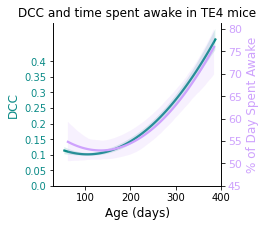

In [17]:
fig, ax1 = plt.subplots(figsize = [3,3])
ax2 = ax1.twinx()

g = sns.regplot(x = 'age_days', y= 'dcc', data = df[df['geno'] == 'te4'], order=2, color = sns.xkcd_rgb['greenish blue'], label='TE4', scatter=False, ax=ax1)
g2 = sns.regplot(x = 'Age', y= '%Wake', data = SW[SW['Genotype'] == 'TE4'], order=2, color = sns.xkcd_rgb['lilac'], label='TE4', scatter=False, ax=ax2)

plt.xlim([30,400])
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
ax1.set_xlabel('Age (days)', fontsize = 12)
ax1.set_ylabel('DCC', fontsize = 12, color=sns.xkcd_rgb['greenish blue'])
ax1.set_yticks(np.arange(0,.42,.05),np.around(np.arange(0,.42,.05),3),color=sns.xkcd_rgb['greenish blue'])
ax2.set_ylabel('% of Day Spent Awake', fontsize = 12, color=sns.xkcd_rgb['lilac'])
ax2.set_yticks(np.arange(45,82,5),np.around(np.arange(45,82,5),1),color=sns.xkcd_rgb['lilac'])

#plt.text(3,2.1,'n.s.', color=sns.xkcd_rgb['sea green'])
#plt.text(3,2,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

plt.title('DCC and time spent awake in TE4 mice', fontsize=12)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_TimeAwake_vs_DCC_overlay.pdf')
    


In [18]:
tmpdf_TE4 = SW[SW['Genotype'] == 'TE4']
tmpdf_WT = SW[SW['Genotype'] == 'WT']

for a in np.arange(0,5):
    deg = a+1
    my_fitting = np.polyfit(tmpdf_TE4['Age'], tmpdf_TE4['%Wake'], deg, full=True)
    SSE = my_fitting[1][0]
    N = len(tmpdf_TE4['Age'])
    K = deg + 1

    AIC = N * np.log(SSE/N) + 2*K
    print(f'AIC for TE4, order {deg} = {AIC}')
    
for a in np.arange(0,5):
    deg = a+1
    my_fitting = np.polyfit(tmpdf_WT['Age'], tmpdf_WT['%Wake'], deg, full=True)
    SSE = my_fitting[1][0]
    N = len(tmpdf_WT['Age'])
    K = deg + 1

    AIC = N * np.log(SSE/N) + 2*K
    print(f'AIC for WT, order {deg}  = {AIC}')

AIC for TE4, order 1 = 92.76186448866025
AIC for TE4, order 2 = 83.03649118681183
AIC for TE4, order 3 = 84.88981525471098
AIC for TE4, order 4 = 86.60487521179341
AIC for TE4, order 5 = 85.89510334162951
AIC for WT, order 1  = 82.84695865314522
AIC for WT, order 2  = 84.43304237395941
AIC for WT, order 3  = 85.94246894143288
AIC for WT, order 4  = 86.00999467657363
AIC for WT, order 5  = 87.82740458755524


In [19]:
deg = 2
my_fitting = np.polyfit(tmpdf_TE4['Age'], tmpdf_TE4['%Wake'], deg, full=True)
SSE = my_fitting[1][0]
N = len(tmpdf_TE4['Age'])
K = deg
a = my_fitting[0][0]
b = my_fitting[0][1]
c = my_fitting[0][2]
x = np.linspace(0,500, 500)
y = a*x**2 + b*x + c
dy = np.diff(y) # first derivative

print(f'Inflection point of Time Spent Awake data: {np.min(np.where(dy > 0))}')

deg = 2

dcc_df = []
dcc_df = df[df['geno'] == 'te4']
dcc_df = dcc_df[dcc_df.dcc < 1]
my_fitting = np.polyfit(dcc_df['age_days'], dcc_df['dcc'], deg, full=True)
SSE = my_fitting[1][0]
N = len(dcc_df)
K = deg
a = my_fitting[0][0]
b = my_fitting[0][1]
c = my_fitting[0][2]
x = np.linspace(0,500, 500)
y = a*x**2 + b*x + c
dy = np.diff(y) # first derivative

print(f'Inflection point of DCC data: {np.min(np.where(dy > 0))}')



Inflection point of Time Spent Awake data: 134
Inflection point of DCC data: 115


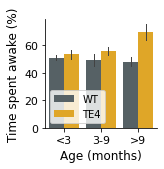

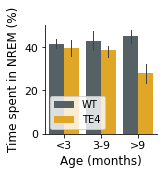

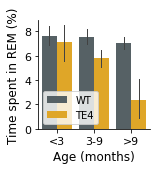

In [20]:
bins = [0, 91, 274, 500]
labels = [1,2,3]

SW['binned'] = pd.cut(SW['Age'], bins=bins, labels=labels)
SW

plt.figure(figsize=(2,2))
sns.barplot(x = 'binned', hue='Genotype',palette = [sns.xkcd_rgb['gunmetal'],sns.xkcd_rgb['saffron']],
    y = '%Wake', data = SW, errwidth = 1)

#plt.ylim([0,100])
plt.legend(fontsize=10)
plt.xticks([0,1,2], ['<3','3-9','>9'], fontsize=11)
plt.xlabel('Age (months)', fontsize=12)
plt.yticks(fontsize=11)
plt.ylabel('Time spent awake (%)', fontsize=12)
sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_5/{today}_AmtWAKE_by_geno_barplot.pdf')
    
plt.figure(figsize=(2,2))
sns.barplot(x = 'binned', hue='Genotype',palette = [sns.xkcd_rgb['gunmetal'],sns.xkcd_rgb['saffron']],
    y = '%NREM', data = SW, errwidth = 1)

#plt.ylim([0,100])
plt.legend(fontsize=10)
plt.xticks([0,1,2], ['<3','3-9','>9'], fontsize=11)
plt.xlabel('Age (months)', fontsize=12)
plt.yticks(fontsize=11)
plt.ylabel('Time spent in NREM (%)', fontsize=12)
sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_5/{today}_AmtNREM_by_geno_barplot.pdf')
  

plt.figure(figsize=(2,2))
sns.barplot(x = 'binned', hue='Genotype',palette = [sns.xkcd_rgb['gunmetal'],sns.xkcd_rgb['saffron']],
    y = '%REM', data = SW, errwidth = 1)

#plt.ylim([0,100])
plt.legend(fontsize=10)
plt.xticks([0,1,2], ['<3','3-9','>9'], fontsize=11)
plt.xlabel('Age (months)', fontsize=12)
plt.yticks(fontsize=11)
plt.ylabel('Time spent in REM (%)', fontsize=12)
sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_5/{today}_AmtREM_by_geno_barplot.pdf')
  


In [ ]:
from scipy import stats 
print('Using scipy.stats.ttest_ind: ')

tmpdf = []
tmpdf = SW[SW.Age < 91]
tmpdf_WT = []
tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%Wake'])
tmpdf_TE4 = []
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%Wake'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %Wake, < 3 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 91]
tmpdf = tmpdf[tmpdf.Age < 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%Wake'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%Wake'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %Wake, 3-9 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%Wake'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%Wake'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %Wake, >9 months old  = {p}')

print('Using scipy.stats.ttest_ind: ')

tmpdf = []
tmpdf = SW[SW.Age < 91]
tmpdf_WT = []
tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%NREM'])
tmpdf_TE4 = []
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%NREM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %NREM, < 3 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 91]
tmpdf = tmpdf[tmpdf.Age < 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%NREM'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%NREM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %NREM, 3-9 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%NREM'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%NREM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %NREM, >9 months old  = {p}')

print('Using scipy.stats.ttest_ind: ')

tmpdf = []
tmpdf = SW[SW.Age < 91]
tmpdf_WT = []
tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%REM'])
tmpdf_TE4 = []
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%REM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %REM, < 3 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 91]
tmpdf = tmpdf[tmpdf.Age < 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%REM'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%REM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %REM, 3-9 months old  = {p}')

tmpdf = []
tmpdf = SW[SW.Age > 274]

tmpdf_WT = np.array(tmpdf[tmpdf.Genotype == 'WT']['%REM'])
tmpdf_TE4 = np.array(tmpdf[tmpdf.Genotype == 'TE4']['%REM'])

[h,p] = stats.ttest_ind(tmpdf_WT, tmpdf_TE4)
print(f'p value for WT vs TE4 %REM, >9 months old  = {p}')




In [50]:
sleepstates_hr1 = np.load('/media/HlabShare/Sleep_Scoring_ckbn_noscoring_m77s2p/CAF00034/caf34_07302020/H_2020-07-30_14-14-21_FinalStateshr1.npy')
probs_hr1 = np.load('/media/HlabShare/Sleep_Scoring_ckbn_noscoring_m77s2p/CAF00034/caf34_07302020/H_2020-07-30_14-14-21_FinalStates_probhr1.npy')



In [60]:
sleepstates_hr1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,

In [59]:
for i in np.arange(0,10):
    print(probs_hr1[i,sleepstates_hr1[i]-1])  
    

0.48356417
0.6667613
0.6861022
0.71038795
0.7944038
0.8611039
0.9047109
0.91100746
0.9296729
0.93281525


In [58]:
sleepstates_hr1 = np.load('/media/HlabShare/Sleep_Scoring_ckbn_noscoring_m77s2p/CAF00081_LFP/caf81_02242021/H_2021-02-24_16-17-11_FinalStateshr1.npy')
probs_hr1 = np.load('/media/HlabShare/Sleep_Scoring_ckbn_noscoring_m77s2p/CAF00081_LFP/caf81_02242021/H_2021-02-24_16-17-11_FinalStates_probhr1.npy')





In [61]:
sleepstates_hr1 = np.load('/media/HlabShare/Sleep_Scoring_ckbn_noscoring_m77s2p/CAF00034/caf34_07312020/H_2020-07-31_16-10-56_FinalStateshr1.npy')




In [62]:
sleepstates_hr1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,